# Cross-correlation coefficient distributions from pure noise

In this notebook I explore the distributions of cross-correlation coeffiecients from cross-correlating pure noise. This test is necessary to determine if the AC6 cross-correlation coefficients are high enough to avoid falling into this pitfall.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) # For reproducibility

Define background baselines and cross-correlation width in data points

In [3]:
CC_width = 5
n_trials = 1000
baselines = np.array([10, 100, 500, 1000])

Make a time series array with dimensions (CC_width x nBaslines x n_trials) where CC_width is the number of points to cross correlate, nBaseline is the number of baselines to study, and n_trials is how many random trails to cross-correlate. The noise-model used here Poisson at various count baselines

In [4]:
timeseries = np.zeros((CC_width, len(baselines), n_trials), dtype=float)
for i, baseline in enumerate(baselines):
    for j in range(n_trials):
        timeseries[:, i, j] = np.random.poisson(lam=baseline, size=CC_width)

Now here we define the cross-correlation function

In [5]:
def cross_correlate(x, y):
    cc = np.correlate(x-x.mean(), y-y.mean(), mode='valid')
    norm = np.sqrt(len(y)*len(y)*np.var(x)*np.var(y))
    return cc/norm

Now for each baseline, cross-correlate random pairs of noise from timeseries array

In [34]:
cc_bins = np.arange(-1, 1.1, 0.2)
# number of baselines x number of histrogram bins.
cc_hist = np.zeros((len(baselines), len(cc_bins)-1), dtype=float) 
#np.random.choice(range(5))

for i in range(len(baselines)):
    for _ in range(n_trials):
        # Pick two trials at random.
        idxA, idxB = np.random.choice(np.arange(n_trials), size=2)
        # Cross-correlate the two random time series.
        cc = cross_correlate(timeseries[:, i, idxA], timeseries[:, i, idxB])
        # Now histogram it.
        cc_hist += np.histogram(cc, bins=cc_bins)[0]

Normalize each histogram

In [38]:
for i in range(cc_hist.shape[0]):
    cc_hist[i, :] /= np.sum(cc_hist, axis=1)[i]

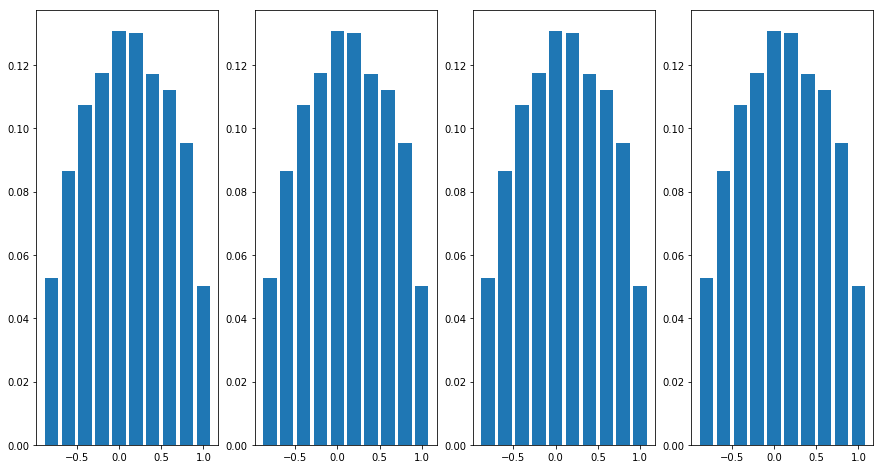

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(15, 8))
for i, baseline in enumerate(baselines):
    ax[i].bar(cc_bins[1:], cc_hist[i, :], width=0.8*(cc_bins[1] - cc_bins[0]), label=baseline)
# ax.text(0.01, 0.99, 'N = {}\nerror_calc = {}\ncc_width= {} s'.format(
#         N, error, width), 
#         transform=ax.transAxes, va='top')
#ax[-1].legend(title="Baseline", fancybox=True)